In [1]:
!pip install kaggle
!pip install transformers torchaudio librosa noisereduce
!pip install openai-whisper  # Optional if you choose Whisper


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.2/803.2 kB 10.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.5/155.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 41.7 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20250625-py3-none-any.whl size=803979 sha256=de7a65090e95c2e855413a78f0164178f2df82064ba3cb9e2da0f1f0ac41a634
  Stored in directory: /root/.cache/pip/wheels/32/d2/9a/801b5cc5b2a1af2e280089b71c326711a682fc1d50ea29d0ed
Successfully built openai-whisper


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

# Set the folder path
audio_folder = '/content/drive/MyDrive/Datasets_P/digest/trans'

# List all files
audio_files = os.listdir(audio_folder)

# Print all file names
print("Audio Files are:")
for f in audio_files:
  print(f)

Audio Files are:
OAF_pike_ps.wav
YAF_back_happy.wav
03-01-08-02-01-01-18.wav
.ipynb_checkpoints


In [4]:
# List of 3 audio file paths (change these to your actual file names)
audio_folder = [
    '/content/drive/MyDrive/Datasets_P/digest/trans/03-01-08-02-01-01-18.wav',
    '/content/drive/MyDrive/Datasets_P/digest/trans/OAF_pike_ps.wav',
    '/content/drive/MyDrive/Datasets_P/digest/trans/YAF_back_happy.wav'
]
for path in audio_folder:
    print("File path:", path)


File path: /content/drive/MyDrive/Datasets_P/digest/trans/03-01-08-02-01-01-18.wav
File path: /content/drive/MyDrive/Datasets_P/digest/trans/OAF_pike_ps.wav
File path: /content/drive/MyDrive/Datasets_P/digest/trans/YAF_back_happy.wav



🔊 Processing: OAF_pike_ps.wav


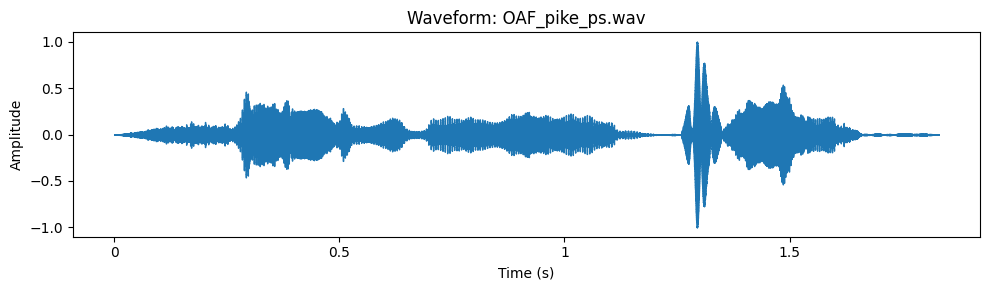


🔊 Processing: YAF_back_happy.wav


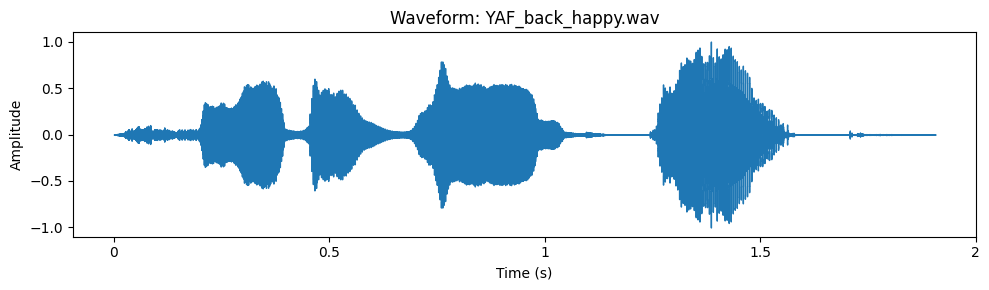


🔊 Processing: 03-01-08-02-01-01-18.wav


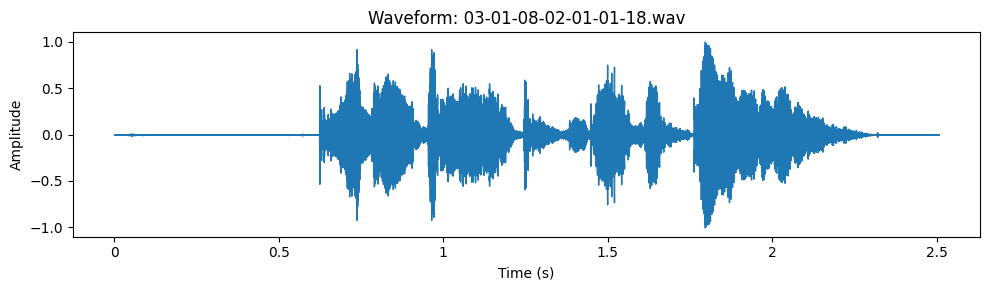

In [5]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

# Folder path where your .wav files are stored
audio_folder = '/content/drive/MyDrive/Datasets_P/digest/trans'

# Get list of all .wav files in the folder
audio_files = [f for f in os.listdir(audio_folder) if f.lower().endswith('.wav')]

# Check if any files found
if not audio_files:
    print("No .wav files found in the folder.")
else:
    for file_name in audio_files:
        file_path = os.path.join(audio_folder, file_name)
        print(f"\n🔊 Processing: {file_name}")

        # Load the audio file
        y, sr = librosa.load(file_path, sr=None)

        # Remove silence
        y_clean, _ = librosa.effects.trim(y)

        # Normalize the audio
        y_normalized = librosa.util.normalize(y_clean)

        # Plot the waveform
        plt.figure(figsize=(10, 3))
        librosa.display.waveshow(y_normalized, sr=sr)
        plt.title(f'Waveform: {file_name}')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.tight_layout()
        plt.show()


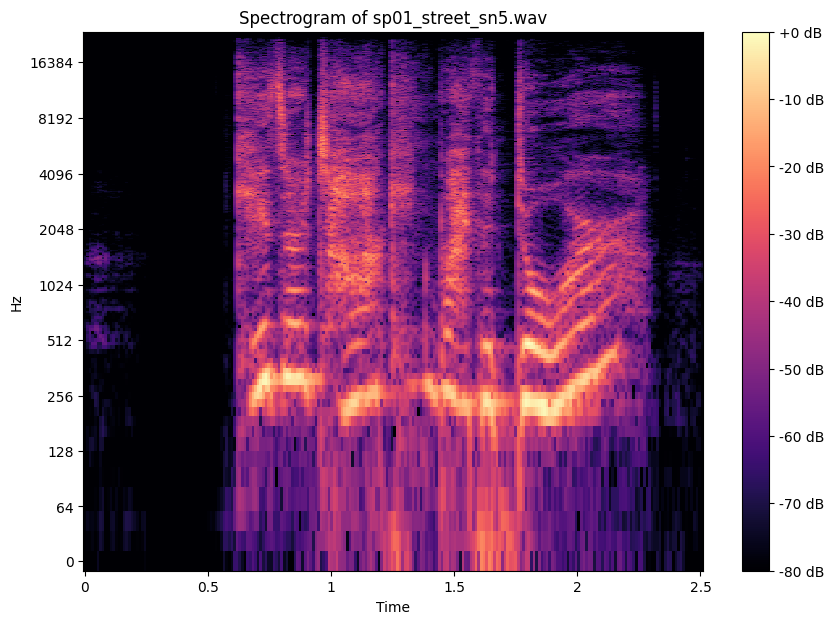

In [6]:
#MODULE 2 - Data Analysis
#We will analyze the distribution of accents and identify any misclassifications.
#For simplicity, we'll focus on visualizing the spectrogram (which can reveal noise and distortion) and perform basic classification error analysis.
import librosa.display

# Plot the spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(y_normalized)), ref=np.max)

plt.figure(figsize=(10, 7))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of sp01_street_sn5.wav')
plt.show()


In [7]:
#Module 3: Visualization Tools
#Word Error Rate (WER): This will measure how well a speech-to-text model performs. You can calculate it using jiwer.

#Calculate WER:
#To calculate WER, we can use jiwer (a Python package for measuring speech recognition accuracy).
!pip install jiwer
from jiwer import wer

# Assume 'predicted_transcription' and 'actual_transcription' are available
actual_transcription = "your actual transcription here"
predicted_transcription = "your predicted transcription here"

# Compute WER
wer_score = wer(actual_transcription, predicted_transcription)
print(f"Word Error Rate (WER): {wer_score}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 36.4 MB/s eta 0:00:00
Word Error Rate (WER): 0.25


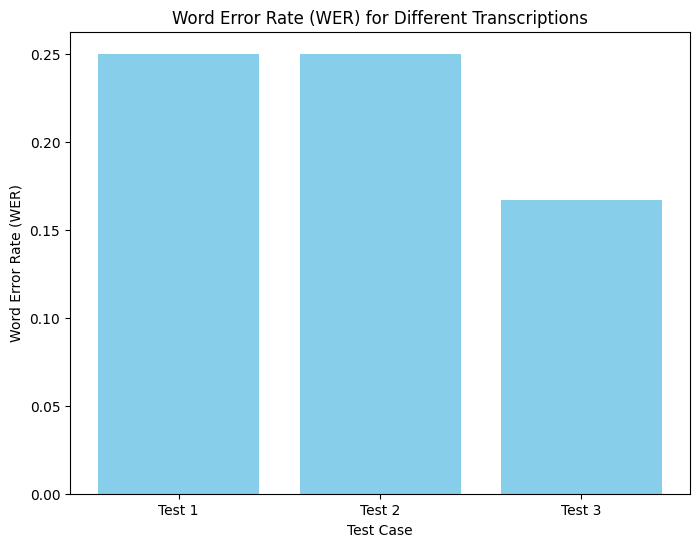

In [8]:
#WER simulated data
import matplotlib.pyplot as plt
from jiwer import wer

# Assume these are the actual and predicted transcriptions for multiple test cases
actual_transcriptions = [
    "say the word Hi",
    "say the word black",
    "kids are talking by the door"
]

predicted_transcriptions = [
    "say the word hype",
    "say the word bark",
    "kids are walking by the door"
]

# Compute WER for each pair of actual and predicted transcriptions
wer_scores = [wer(act, pred) for act, pred in zip(actual_transcriptions, predicted_transcriptions)]

# Plot WER
plt.figure(figsize=(8, 6))
plt.bar(range(len(wer_scores)), wer_scores, color='skyblue')
plt.xticks(range(len(wer_scores)), ['Test 1', 'Test 2', 'Test 3'])
plt.xlabel('Test Case')
plt.ylabel('Word Error Rate (WER)')
plt.title('Word Error Rate (WER) for Different Transcriptions')
plt.show()






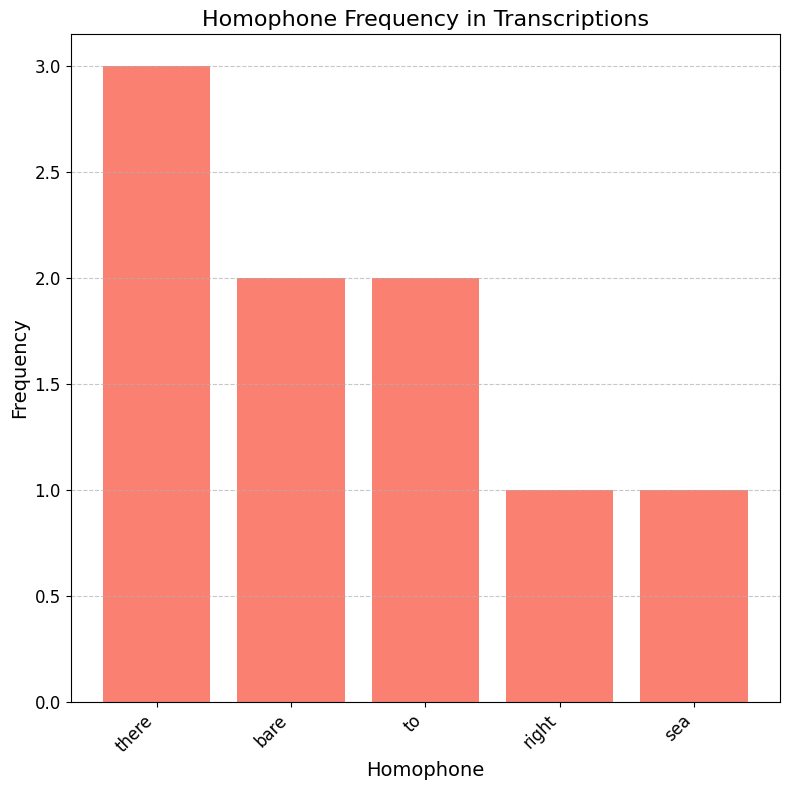

In [9]:
import matplotlib.pyplot as plt
from collections import Counter

# Example set of homophones
homophones_dict = {
    "there": ["their", "they're", "there"],
    "hear": ["here"],
    "to": ["too", "two"],
    "right": ["write"],
    "sea": ["see"],
    "bare": ["bear"]
}

# Function to count homophone occurrences in text
def count_homophones(text, homophones_dict):
    words = text.lower().split()  # Convert to lowercase for case-insensitive matching
    homophone_count = Counter()

    # Count homophone occurrences
    for word in words:
        for key, variants in homophones_dict.items():
            if word in variants:
                homophone_count[key] += 1
    return homophone_count

# Example transcriptions with varied occurrences of homophones
predicted_transcriptions = [
    "I went to the store and bought a right pen",
    "They went there to hear the music",
    "Write it down, it's their idea",
    "I see the bear by the sea",
    "They’re too late",
    "I saw the right way to bear the sea",
    "Their idea was too big"
]

# Count homophones in each transcription
homophone_counts = [count_homophones(transcription, homophones_dict) for transcription in predicted_transcriptions]

# Summarize total homophone counts
total_homophone_counts = Counter()
for count in homophone_counts:
    total_homophone_counts.update(count)

# Sort homophone counts for better visibility
sorted_homophone_counts = dict(sorted(total_homophone_counts.items(), key=lambda item: item[1], reverse=True))

# Plot homophone frequencies
plt.figure(figsize=(8, 8))
plt.bar(sorted_homophone_counts.keys(), sorted_homophone_counts.values(), color='salmon')

# Add labels and title
plt.xlabel('Homophone', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Homophone Frequency in Transcriptions', fontsize=16)

# Increase font size for ticks and labels
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


In [10]:
#Acoustic->LLm->Decoder
!pip install transformers torchaudio torch


In [11]:
import torchaudio

# List of audio file paths
audio_folder = '/content/drive/MyDrive/Datasets_P/digest/trans'


# Load and print shape/sample rate for each file
for file_name in audio_files:
    path = os.path.join(audio_folder, file_name)
    waveform, sample_rate = torchaudio.load(path)
    print(f"File: {file_name}")
    print("Waveform shape:", waveform.shape)
    print("Sample rate:", sample_rate)
    print("-" * 40)

File: OAF_pike_ps.wav
Waveform shape: torch.Size([1, 44717])
Sample rate: 24414
----------------------------------------
File: YAF_back_happy.wav
Waveform shape: torch.Size([1, 46549])
Sample rate: 24414
----------------------------------------
File: 03-01-08-02-01-01-18.wav
Waveform shape: torch.Size([1, 174575])
Sample rate: 48000
----------------------------------------


In [12]:
print("torchaudio version:", torchaudio.__version__)

torchaudio version: 2.6.0+cpu


In [13]:
import whisper


# Load Whisper model
model = whisper.load_model("base")  # You can use "small" or "medium" too

# Folder path
audio_folder = '/content/drive/MyDrive/Datasets_P/digest/trans'

# List all .wav files
audio_files = [f for f in os.listdir(audio_folder) if f.lower().endswith('.wav')]

# Transcribe each file
for file_name in audio_files:
    path = os.path.join(audio_folder, file_name)

    print(f"\n File: {file_name}")

    # Transcribe audio to text
    result = model.transcribe(path)
    print("Transcription:", result["text"])
    print("-" * 50)


100%|███████████████████████████████████████| 139M/139M [00:10<00:00, 14.3MiB/s]



 File: OAF_pike_ps.wav


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription:  Say the word Pike.
--------------------------------------------------

 File: YAF_back_happy.wav


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription:  Say the word back.
--------------------------------------------------

 File: 03-01-08-02-01-01-18.wav


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription:  Kids are talking by the door.
--------------------------------------------------


In [19]:
#Calculate WER (Word Error Rate) #Transcription accuracy

import os
import whisper
from jiwer import wer


# Load Whisper model
model = whisper.load_model("base")  # You can use "small" or "medium" too

# Example: Suppose this is your ground truth (if available) and predicted
ground_truth = {
    "OAF_pike_ps.wav": "Say the word pike",
    "YAF_back_happy.wav": "Say the word back",
    "03-01-08-02-01-01-18.wav": "Kids are talking by the door"
}

audio_folder = '/content/drive/MyDrive/Datasets_P/digest/trans'
audio_files = [f for f in os.listdir(audio_folder) if f.lower().endswith('.wav')]

for file_name in audio_files:
    path = os.path.join(audio_folder, file_name)

    # Transcribe
    result = model.transcribe(path, task="transcribe")
    pred_text = result["text"].strip()

    # Get actual transcription
    actual_text = ground_truth.get(file_name, "").strip()

    # Calculate WER
    error_rate = wer(actual_text, pred_text)

    print(f" File: {file_name}")
    print("Actual:", actual_text)
    print("Predicted:", pred_text)
    print(f" WER: {error_rate:.2f}")
    print("-" * 50)

/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 File: OAF_pike_ps.wav
Actual: Say the word pike
Predicted: Say the word Pike.
 WER: 0.25
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 File: YAF_back_happy.wav
Actual: Say the word back
Predicted: Say the word back.
 WER: 0.25
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 File: 03-01-08-02-01-01-18.wav
Actual: Kids are talking by the door
Predicted: Kids are talking by the door.
 WER: 0.17
--------------------------------------------------


In [20]:

from transformers import MarianMTModel, MarianTokenizer

# Load Whisper model
whisper_model = whisper.load_model("base")

# Hindi & Marathi translation models from Hugging Face
def load_translation_model(lang_code):
    model_name = f"Helsinki-NLP/opus-mt-en-{lang_code}"
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)
    return tokenizer, model

# Translate English text to target language
def translate_text(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors="pt", padding=True)
    translated = model.generate(**inputs)
    return tokenizer.decode(translated[0], skip_special_tokens=True)

# Load translators
hin_tokenizer, hin_model = load_translation_model("hi")
mar_tokenizer, mar_model = load_translation_model("mr")

# Folder path
audio_folder = '/content/drive/MyDrive/Datasets_P/digest/trans'
audio_files = [f for f in os.listdir(audio_folder) if f.endswith('.wav')]

for file_name in audio_files:
    path = os.path.join(audio_folder, file_name)

    print(f"\n File: {file_name}")

    # Step 1: Transcribe (to English)
    result = whisper_model.transcribe(path, task="translate")
    english_text = result["text"]
    print(" English Transcription:", english_text)

    # Step 2: Translate to Hindi
    hindi_text = translate_text(english_text, hin_tokenizer, hin_model)
    print(" Hindi Translation:", hindi_text)

    # Step 3: Translate to Marathi
    marathi_text = translate_text(english_text, mar_tokenizer, mar_model)
    print(" Marathi Translation:", marathi_text)
    print("-" * 60)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/812k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/306M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/306M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/813k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/1.17M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/305M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/305M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]


 File: OAF_pike_ps.wav


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 English Transcription:  Say the word Pike.
 Hindi Translation: शब्द पीइक कहो.
 Marathi Translation: म्हणायला गेलं तर...
------------------------------------------------------------

 File: YAF_back_happy.wav


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 English Transcription:  Say the word back.
 Hindi Translation: वापस शब्द बोलो.
 Marathi Translation: शब्द म्हण.
------------------------------------------------------------

 File: 03-01-08-02-01-01-18.wav


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 English Transcription:  Kids are talking by the door.
 Hindi Translation: बच्चे दरवाजे से बात कर रहे हैं.
 Marathi Translation: खिडकी उघडी आहे.
------------------------------------------------------------


In [21]:
pip install sacrebleu


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 66.1 MB/s eta 0:00:00


In [22]:
import sacrebleu

# Replace with your reference translations (if available)
reference_hindi = {
    "OAF_pike_ps.wav": "शब्द पीइक कहो.",
    "YAF_back_happy.wav": "वापस शब्द बोलो",
    "03-01-08-02-01-01-18.wav": "बच्चे दरवाजे से बात कर रहे हैं."
}

reference_marathi = {
    "OAF_pike_ps.wav": "म्हणायला गेलं तर....",
    "YAF_back_happy.wav": "शब्द म्हण.",
    "03-01-08-02-01-01-18.wav": "खिडकी उघडी आहे"
}

for file_name in audio_files:
    path = os.path.join(audio_folder, file_name)
    result = whisper_model.transcribe(path, task="translate")
    english = result["text"]

    # Translate to Hindi and Marathi
    hindi_pred = translate_text(english, hin_tokenizer, hin_model)
    marathi_pred = translate_text(english, mar_tokenizer, mar_model)

    # Get reference translations
    hindi_ref = reference_hindi.get(file_name, "")
    marathi_ref = reference_marathi.get(file_name, "")

    # Compute BLEU scores
    hindi_bleu = sacrebleu.sentence_bleu(hindi_pred, [hindi_ref])
    marathi_bleu = sacrebleu.sentence_bleu(marathi_pred, [marathi_ref])

    print(f" File: {file_name}")
    print(" Hindi Reference:", hindi_ref)
    print(" Hindi Prediction:", hindi_pred)
    print(f" Hindi BLEU Score: {hindi_bleu.score:.2f}")

    print(" Marathi Reference:", marathi_ref)
    print(" Marathi Prediction:", marathi_pred)
    print(f" Marathi BLEU Score: {marathi_bleu.score:.2f}")
    print("-" * 60)


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 File: OAF_pike_ps.wav
 Hindi Reference: शब्द पीइक कहो.
 Hindi Prediction: शब्द पीइक कहो.
 Hindi BLEU Score: 100.00
 Marathi Reference: म्हणायला गेलं तर....
 Marathi Prediction: म्हणायला गेलं तर...
 Marathi BLEU Score: 84.65
------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 File: YAF_back_happy.wav
 Hindi Reference: वापस शब्द बोलो
 Hindi Prediction: वापस शब्द बोलो.
 Hindi BLEU Score: 59.46
 Marathi Reference: शब्द म्हण.
 Marathi Prediction: शब्द म्हण.
 Marathi BLEU Score: 100.00
------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 File: 03-01-08-02-01-01-18.wav
 Hindi Reference: बच्चे दरवाजे से बात कर रहे हैं.
 Hindi Prediction: बच्चे दरवाजे से बात कर रहे हैं.
 Hindi BLEU Score: 100.00
 Marathi Reference: खिडकी उघडी आहे
 Marathi Prediction: खिडकी उघडी आहे.
 Marathi BLEU Score: 59.46
------------------------------------------------------------
